In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from astropy.table import QTable
from scipy.optimize import curve_fit

In [2]:
D1 = QTable.read('CCDdata.csv', format='ascii.csv')
D1[0:15]

x,y
float64,float64
0.00387,29.9
0.0038,34.5
0.00377,36.8
0.00374,39.1
0.00372,43.7
0.00369,50.6
0.00366,55.2
0.00363,64.4
0.00361,73.6


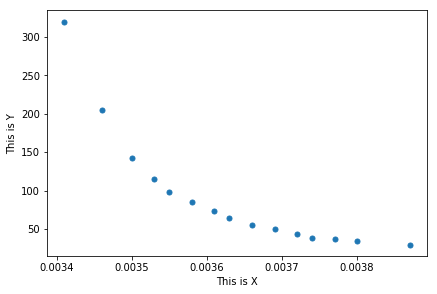

In [3]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(6,4)

fig.tight_layout()

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(D1['x'],D1['y'],marker="o",linestyle="None",markersize=5);

In [4]:
def fit1(x,k,b):
    return k*np.e**(-b*x)

In [5]:
Kguess = 10^13
Bguess = 10^3

fitpars, error = curve_fit(fit1,D1['x'],D1['y'],p0=[Kguess,Bguess])

print(fitpars)

[1.27878966e+13 7.17478524e+03]


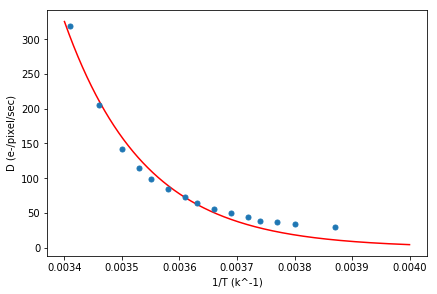

In [6]:
Z = np.linspace(0.0034,0.004,1000)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(6,4)

fig.tight_layout()

ax.set_xlabel("1/T (k^-1)")
ax.set_ylabel("D (e-/pixel/sec)")

ax.plot(Z, fit1(Z, *fitpars), 'r-')

ax.plot(D1['x'],D1['y'],marker="o",linestyle="None",markersize=5);